<a href="https://colab.research.google.com/github/andyra42/MachineLearning/blob/master/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ta

  Created wheel for ta: filename=ta-0.5.25-cp36-none-any.whl size=24880 sha256=9c707516157da6eb5c7837f142dea6af4d33c41580f85cf4117533409fb39c66
  Stored in directory: /root/.cache/pip/wheels/2e/93/b7/cf649194508e53cee4145ffb949e9f26877a5a8dd12db9ed5b
Successfully built ta


In [2]:
import pandas as pd
import ta
from pandas_datareader import data as web
import datetime
import numpy as np
from ta.utils import dropna
import matplotlib.pyplot as plt

In [3]:
stock = 'CVS'

In [4]:
start_date = (datetime.datetime.now() - datetime.timedelta(days=365)).strftime("%m-%d-%Y")
# end_date = datetime.datetime(2020,2,20)
df = web.DataReader(stock, data_source='yahoo', start=start_date)

In [5]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-07,62.549999,61.730000,62.130001,61.990002,4465500.0,60.135098
2019-10-08,61.619999,60.139999,61.480000,60.380001,6950500.0,58.573273
2019-10-09,61.340000,60.610001,60.860001,60.799999,5214900.0,58.980709
2019-10-10,62.500000,60.849998,60.900002,62.139999,6729200.0,60.280609
2019-10-11,63.610001,62.770000,62.799999,62.939999,6278700.0,61.056671
...,...,...,...,...,...,...
2020-09-28,58.599998,57.599998,57.599998,57.939999,5304900.0,57.939999
2020-09-29,57.950001,57.049999,57.950001,57.540001,5779900.0,57.540001
2020-09-30,59.099998,57.599998,57.639999,58.400002,8155100.0,58.400002


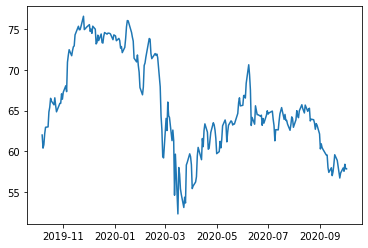

In [6]:
df = dropna(df)
plt.plot(df['Close'])

In [7]:
macd = ta.trend.MACD(close=df['Close'], n_slow=31, n_fast= 15,n_sign=9)
df['MACD'] = macd.macd_diff()

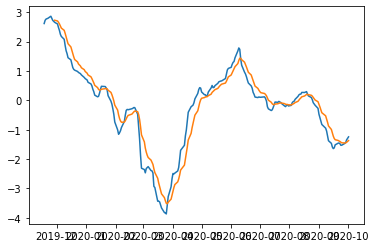

In [8]:
plt.plot(macd.macd())
plt.plot(macd.macd_signal())

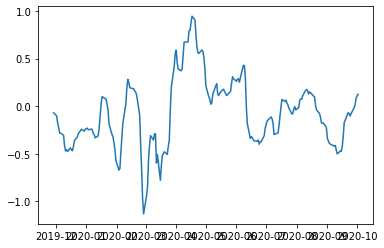

In [9]:
plt.plot(macd.macd_diff())

In [10]:
df['CCI'] = ta.trend.cci(df['High'], df['Low'], df['Close'], n=31, c=0.015)

In [11]:
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], n = 14).rsi()

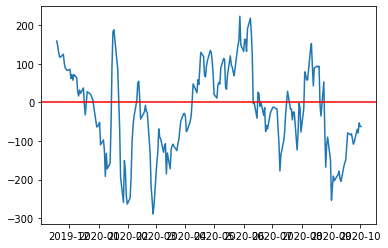

In [12]:
plt.plot(df['CCI'])
plt.axhline(y=0, color='r', linestyle='-')

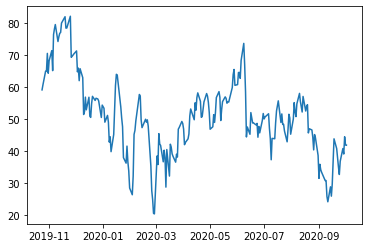

In [13]:
plt.plot(df['RSI'])

In [14]:
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,MACD,CCI,RSI
Date,,,,,,,,,
2020-09-28,58.599998,57.599998,57.599998,57.939999,5304900.0,57.939999,-0.017999,-69.873998,40.687221
2020-09-29,57.950001,57.049999,57.950001,57.540001,5779900.0,57.540001,0.011392,-79.213102,38.986433
2020-09-30,59.099998,57.599998,57.639999,58.400002,8155100.0,58.400002,0.082256,-53.215947,44.370643
2020-10-01,58.669998,57.360001,58.430000,57.840000,7559200.0,57.840000,0.106218,-61.539448,41.784874
2020-10-02,58.689999,56.919998,57.090000,57.830002,7137800.0,57.830002,0.125724,-62.743002,41.738106
